In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("C:/Users/vjain/Downloads/df_transformed_clean.xls")

In [3]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Mas Vnr Area,Exter Qual,Foundation,Bsmt Qual,Bsmt Exposure,Total Bsmt SF,Heating QC,...,Garage Type_NoGarage,Garage Finish_NoGarage,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_Y,SaleType_Grouped_New,SaleType_Grouped_WD,Sale Condition_Partial,HouseAge,RemodAge
0,3.367910,2.505809,6,1.004367,1,3,2,4,0.212431,0,...,0,0,0,0,0,0,1,0,0.397657,1.181065
1,0.499394,0.531773,5,-0.798366,1,3,2,1,0.039205,1,...,0,0,0,1,1,0,1,0,0.364249,1.132837
2,0.546419,0.934275,6,0.990624,1,3,2,1,0.389918,1,...,0,0,0,1,1,0,1,0,0.464472,1.277522
3,1.110717,0.452148,7,-0.798366,2,3,2,1,0.785474,3,...,0,0,0,0,1,0,1,0,0.130395,0.795236
4,0.217245,0.873209,5,-0.798366,1,5,3,1,0.082686,2,...,0,0,0,0,1,0,1,0,-0.838430,-0.651622


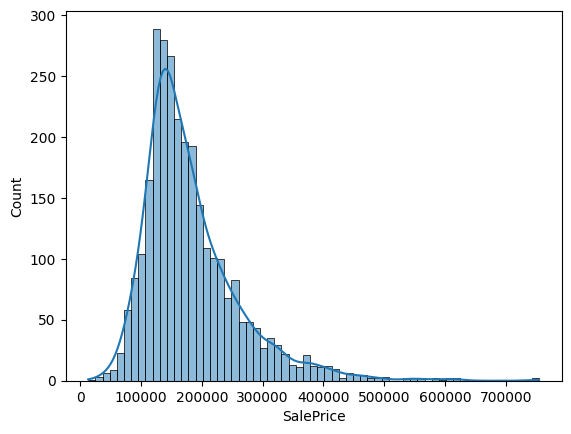

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y, kde=True)
plt.show()

In [7]:
import numpy as np

y = np.log1p(df["SalePrice"])

# Multiple Linear Regression

In [18]:
X = df.drop("SalePrice", axis=1)
y = np.log1p(df["SalePrice"])

In [19]:
X.shape

(2880, 57)

In [20]:
y.shape

(2880,)

In [21]:
# train  tests split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# fit the model
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
# evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = mlr.predict(X_test)

residuals = y_test - y_pred

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)

(0.08656672745825539, np.float64(0.12034333691114626), 0.9004123597642404)

In [24]:
n = X_test.shape[0]
p = X_test.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2

0.8894538742556722

In [25]:
#Coefficient analysis
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df.head(15)

,Feature,Coefficient
48,Garage Finish_NoGarage,0.269384
11,Gr Liv Area,0.143710
10,Central Air,0.108891
52,SaleType_Grouped_New,0.078185
2,Overall Qual,0.071637
46,Garage Type_Detchd,0.066793
44,Garage Type_Attchd,0.061372
40,Mas Vnr Type_None,0.058225
12,Bsmt Full Bath,0.052203
51,Paved Drive_Y,0.050707


In [26]:
coef_df.tail(15)

,Feature,Coefficient
25,LotShape_Grouped_Reg,-0.001047
18,Fireplace Qu,-0.001942
37,Exterior 1st_VinylSd,-0.003869
16,TotRms AbvGrd,-0.005848
49,Garage Finish_RFn,-0.008099
39,Exterior 2nd_VinylSd,-0.008374
50,Garage Finish_Unf,-0.011044
29,Neighborhood_Grouped_mid_price_nbhd,-0.013467
55,HouseAge,-0.026240
56,RemodAge,-0.028732


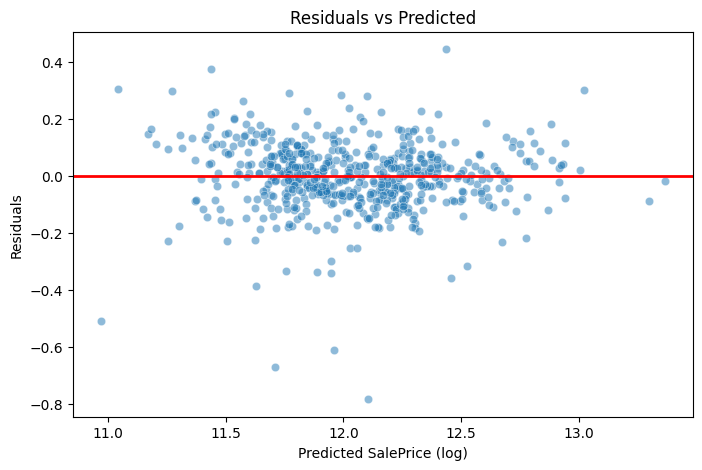

In [27]:
# Visualise
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linewidth=2)
plt.xlabel("Predicted SalePrice (log)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

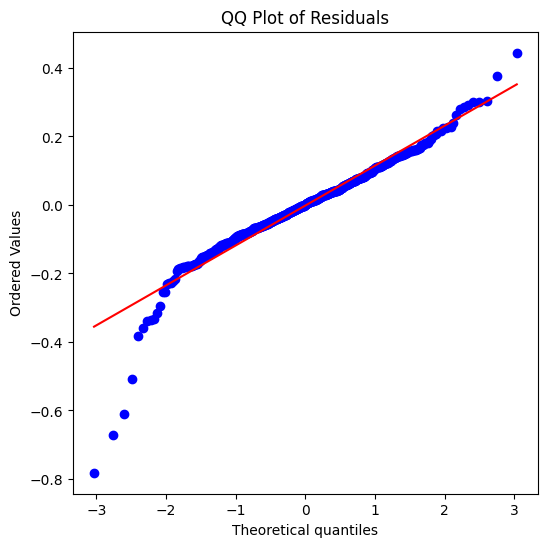

In [28]:
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

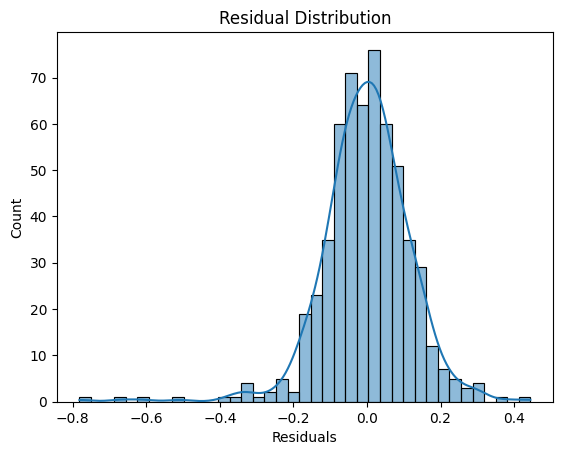

In [29]:
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

# ELASTIC NET

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]
alphas    = [0.0001, 0.001, 0.01, 0.1]

results_en = []

for lr in l1_ratios:
    for a in alphas:
        en = ElasticNet(alpha=a, l1_ratio=lr, max_iter=5000)
        en.fit(X_train, y_train)

        y_pred_en = en.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred_en)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_en))
        r2 = r2_score(y_test, y_pred_en)

        results_en.append((lr, a, mae, rmse, r2))

results_en

[(0.1,
  0.0001,
  0.08648770075590105,
  np.float64(0.12024095136666677),
  0.9005817417610918),
 (0.1,
  0.001,
  0.08640395743690406,
  np.float64(0.12003441978903627),
  0.9009229795049566),
 (0.1,
  0.01,
  0.0877010028122701,
  np.float64(0.12117545832157159),
  0.8990303886270701),
 (0.1,
  0.1,
  0.09768855913738149,
  np.float64(0.1317152615966082),
  0.8807018963759162),
 (0.3,
  0.0001,
  0.08648702544391479,
  np.float64(0.12022000213772226),
  0.9006163814474043),
 (0.3,
  0.001,
  0.08668100180968598,
  np.float64(0.1202174644512106),
  0.9006205771187059),
 (0.3,
  0.01,
  0.09108199392117913,
  np.float64(0.12470055415990576),
  0.8930703588057156),
 (0.3,
  0.1,
  0.11058077772980444,
  np.float64(0.14713286882467622),
  0.8511390628860804),
 (0.5,
  0.0001,
  0.08649074769889853,
  np.float64(0.12020174102081246),
  0.9006465713993093),
 (0.5,
  0.001,
  0.08705846361653624,
  np.float64(0.1205547071334778),
  0.9000622224302404),
 (0.5,
  0.01,
  0.09333101852293109,

In [33]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.0001, l1_ratio=0.9, max_iter=5000)
en.fit(X_train, y_train)

coef_en = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': en.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_en.head(20), coef_en.tail(20)

(                              Feature  Coefficient
 11                        Gr Liv Area     0.143728
 10                        Central Air     0.107783
 52               SaleType_Grouped_New     0.074128
 2                        Overall Qual     0.072273
 46                 Garage Type_Detchd     0.058041
 44                 Garage Type_Attchd     0.052561
 12                     Bsmt Full Bath     0.052117
 51                      Paved Drive_Y     0.049910
 30  Neighborhood_Grouped_premium_nbhd     0.044865
 40                  Mas Vnr Type_None     0.044650
 1                            Lot Area     0.042937
 17                         Fireplaces     0.039293
 35               Exterior 1st_CemntBd     0.035183
 53               SaleType_Grouped_WD      0.034034
 15                       Kitchen Qual     0.031494
 41                 Mas Vnr Type_Stone     0.025658
 26                   Land Contour_HLS     0.023259
 3                        Mas Vnr Area     0.022549
 34         

# XGBOOST

In [37]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ---------------------------
# 1. Train XGBoost Model
# ---------------------------

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,             # safer than 7 — prevents overfitting
    subsample=0.7,           # row sampling
    colsample_bytree=0.7,    # feature sampling
    reg_alpha=0.0001,        # L1 penalty
    reg_lambda=0.9,          # L2 penalty
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

# ---------------------------
# 2. Predictions
# ---------------------------

y_pred_xgb = xgb.predict(X_test)

# ---------------------------
# 3. Evaluation Metrics
# ---------------------------

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

(mae, rmse, r2)

(0.08058968470724606, np.float64(0.11760298400316595), 0.9048961659577837)

In [38]:
import pandas as pd

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances.head(20)

,Feature,Importance
4,Exter Qual,0.285084
2,Overall Qual,0.167760
20,Garage Cars,0.104839
10,Central Air,0.064856
15,Kitchen Qual,0.031342
11,Gr Liv Area,0.029865
44,Garage Type_Attchd,0.025215
30,Neighborhood_Grouped_premium_nbhd,0.019886
17,Fireplaces,0.016691
23,MS_Zoning_Grouped_MidZone,0.016663


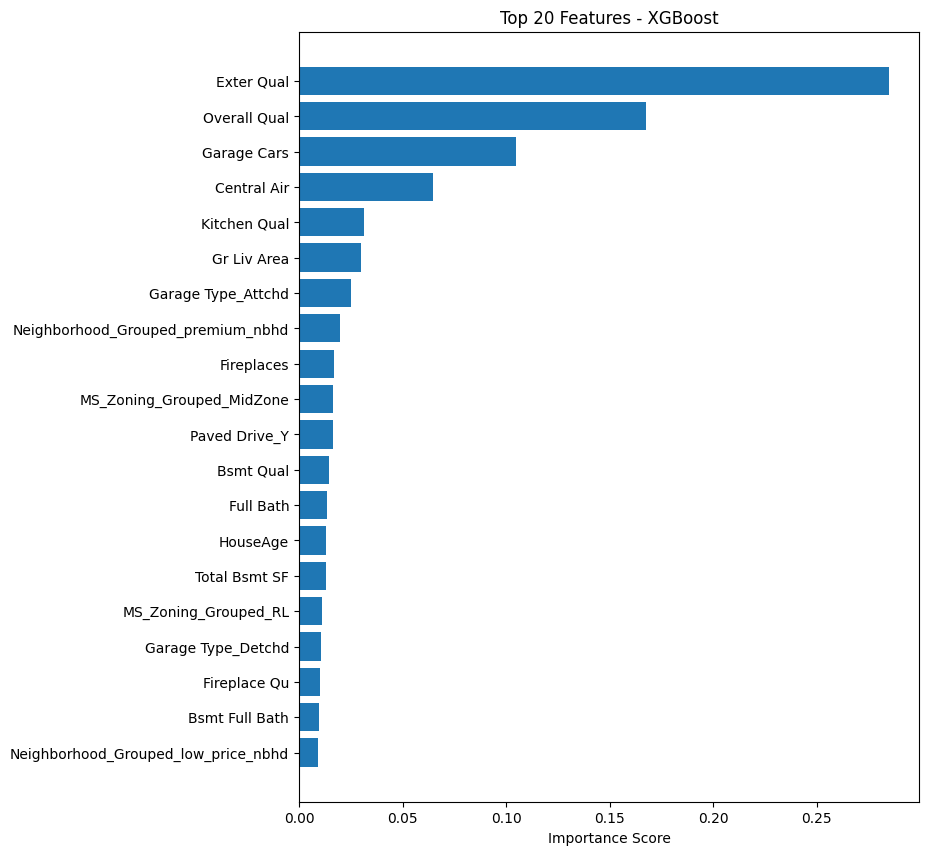

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 10))
plt.barh(importances['Feature'].head(20), importances['Importance'].head(20))
plt.gca().invert_yaxis()
plt.title("Top 20 Features - XGBoost")
plt.xlabel("Importance Score")
plt.show()

# CROSS VALIDATION

In [45]:
# reusable model
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

def evaluate_model(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # R2
    r2 = cross_val_score(model, X, y, cv=kf, scoring="r2")

    # RMSE (positive)
    rmse = -cross_val_score(model, X, y, cv=kf,
                            scoring="neg_root_mean_squared_error")

    return r2, rmse

In [47]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.01, l1_ratio=0.5)  # default for now
r2_enet, rmse_enet = evaluate_model(enet, X, y)

print("ENet R2:", r2_enet.mean())
print("ENet RMSE:", rmse_enet.mean())

ENet R2: 0.8866889372028561
ENet RMSE: 0.13465114840006678


In [48]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.0001,
    reg_lambda=0.9,
    random_state=42,
    n_jobs=-1
)

r2_xgb, rmse_xgb = evaluate_model(xgb, X, y)

print("XGBoost R2:", r2_xgb.mean())
print("XGBoost RMSE:", rmse_xgb.mean())

XGBoost R2: 0.9058786950781025
XGBoost RMSE: 0.12262868783641431


## SHAP implementation

In [53]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
background = X_train.sample(100, random_state=42)

explainer_lr = shap.KernelExplainer(mlr.predict, background)

shap_values_lr = explainer_lr.shap_values(
    X_train.iloc[:500],
    nsamples=200
)

  0%|          | 0/500 [00:00<?, ?it/s]

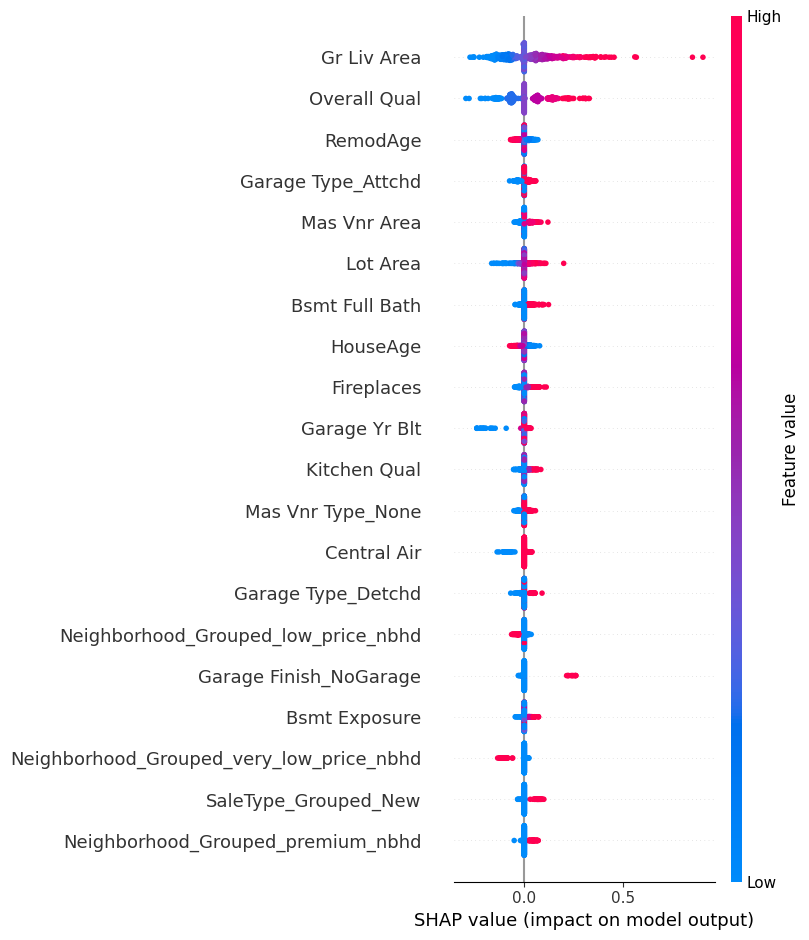

In [56]:
shap.summary_plot(shap_values_lr, X_train.iloc[:500])

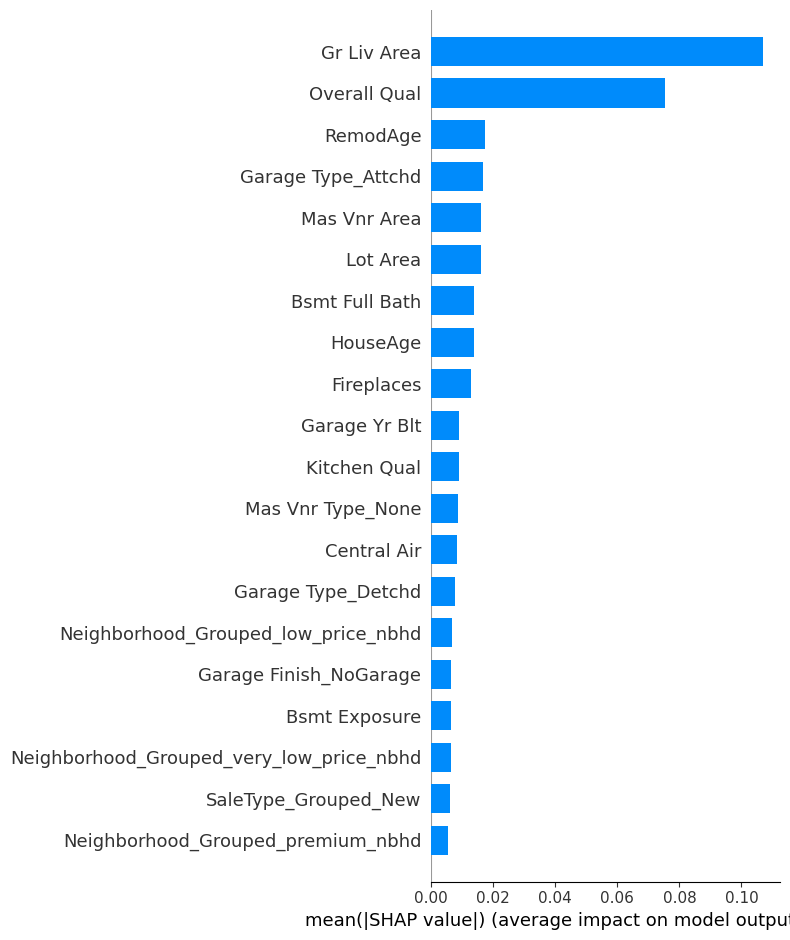

In [57]:
shap.summary_plot(shap_values_lr, X_train.iloc[:500], plot_type="bar")
